In [64]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [65]:
train_data = datasets.MNIST(
    root= 'data',
    train= True,
    transform= ToTensor(),
    download= True
)

test_data = datasets.MNIST(
    root= 'data',
    train= False,
    transform= ToTensor(),
    download= True
)

In [53]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [54]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [55]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data,
                         batch_size= 100,
                         shuffle= True,
                         num_workers= 1),
    
    'test' : DataLoader(test_data,
                         batch_size= 100,
                         shuffle= True,
                         num_workers= 1),
}

In [56]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1b7a7257fe0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1b7a8ad8e60>}

In [57]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 


class CNN(nn.Module) :
    
    def __init__(self) :
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 10, kernel_size= 5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.lc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
        
    def forward(self, x) :
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.lc1(x))
        x = F.dropout(x , training=self.training)
        x = self.fc2(x)
        
        return F.softmax(x)

In [61]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(eopch) :
    model.train()
    for bach_idx, (data, target) in enumerate(loaders['train']) :
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if bach_idx % 20 == 0 :
            print(f'train Epoch : {eopch} [{bach_idx * len(data)} / {len(loaders['train'].dataset)} ({100. * bach_idx / len(loaders['train']):.0f}%)]\t {loss.item():.6f}')
            
            
            
def test() :
    model.eval()
    
    test_loss = 0
    correct = 0
    
    with torch.no_grad() :
        for data, target in loaders['test'] :
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim= True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(loaders['test'].dataset)
    print(f'\n Test set : AVerage loss : {test_loss:.4f}, Accuracy {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%\n)')

In [62]:
for epoch in range (1, 11) :
    train(epoch)
    test()

C:\Users\youce\AppData\Local\Temp\ipykernel_16908\2003311039.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


train Epoch : 1 [0 / 60000 (0%)]	 2.303526
train Epoch : 1 [2000 / 60000 (3%)]	 2.256361
train Epoch : 1 [4000 / 60000 (7%)]	 2.123367
train Epoch : 1 [6000 / 60000 (10%)]	 2.048583
train Epoch : 1 [8000 / 60000 (13%)]	 1.935327
train Epoch : 1 [10000 / 60000 (17%)]	 1.852286
train Epoch : 1 [12000 / 60000 (20%)]	 1.808945
train Epoch : 1 [14000 / 60000 (23%)]	 1.802718
train Epoch : 1 [16000 / 60000 (27%)]	 1.791667
train Epoch : 1 [18000 / 60000 (30%)]	 1.740538
train Epoch : 1 [20000 / 60000 (33%)]	 1.692281
train Epoch : 1 [22000 / 60000 (37%)]	 1.634634
train Epoch : 1 [24000 / 60000 (40%)]	 1.735476
train Epoch : 1 [26000 / 60000 (43%)]	 1.784103
train Epoch : 1 [28000 / 60000 (47%)]	 1.664041
train Epoch : 1 [30000 / 60000 (50%)]	 1.691388
train Epoch : 1 [32000 / 60000 (53%)]	 1.677555
train Epoch : 1 [34000 / 60000 (57%)]	 1.639066
train Epoch : 1 [36000 / 60000 (60%)]	 1.653026
train Epoch : 1 [38000 / 60000 (63%)]	 1.634571
train Epoch : 1 [40000 / 60000 (67%)]	 1.651008
tra

C:\Users\youce\AppData\Local\Temp\ipykernel_16908\2003311039.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction : 7


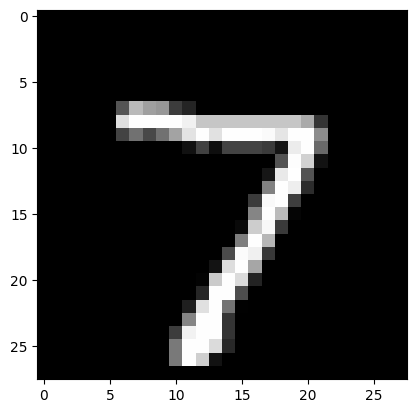

In [67]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[0]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction : {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()